In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Constants:
all_data_desktop = r'C:\Data Sciences\data\all_data'
in_desktop = r'C:\Data Sciences\data\in'
out_desktop = r'C:\Data Sciences\data\out'

In [2]:
df = pd.read_excel(r'C:\Data Sciences\data\in\spend_data.xlsx').fillna("Other")
df.drop(['Income/Expense','Note2','Amount','Currency','Account3'], axis=1, inplace=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         84 non-null     datetime64[ns]
 1   Account      84 non-null     object        
 2   Category     84 non-null     object        
 3   Subcategory  84 non-null     object        
 4   Note         84 non-null     object        
 5   USD          84 non-null     float64       
 6   Year         84 non-null     int64         
 7   Month        84 non-null     int64         
 8   Day          84 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 6.0+ KB


In [4]:
df.head()

,Date,Account,Category,Subcategory,Note,USD,Year,Month,Day
0,2022-02-01 08:43:02,AMEX,Groceries,Other,Price chopper,206.80,2022,2,1
1,2022-02-01 09:50:43,AMEX,Fuel,Other,Casey's,64.02,2022,2,1
2,2022-02-01 09:51:03,AMEX,Transportation,Car,Casey's,16.00,2022,2,1
3,2022-02-01 09:51:25,AMEX,Food,Snacks,Casey's,13.69,2022,2,1
4,2022-02-01 14:28:26,AMEX,Beauty,Cosmetics,Scotch and Scissors,56.00,2022,2,1


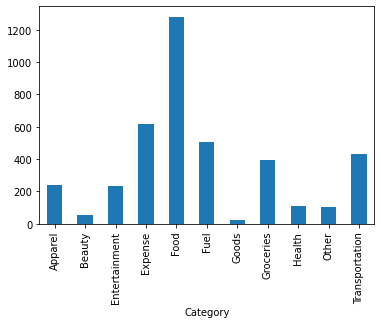

In [5]:
#plot the bar graph of marital status with average value of response_rate
df.groupby('Category')['USD'].sum().plot.bar()
plt.show()

In [6]:
piv_1 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Category'], 
                                columns=['Month'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),2)

piv_1

sum                  
Month                 2        3    Total
Category                                 
Apparel          237.15     0.00   237.15
Beauty            56.00     0.00    56.00
Entertainment    231.27     0.00   231.27
Expense            0.00   616.93   616.93
Food             562.88   717.46  1280.34
Fuel             135.67   372.87   508.54
Goods             25.44     0.00    25.44
Groceries        285.87   105.96   391.83
Health             0.00   111.00   111.00
Other            106.87     0.00   106.87
Transportation    31.00   400.04   431.04
Total           1672.15  2324.26  3996.41

In [7]:
piv_2 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Subcategory'], 
                                columns=['Category'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),2)

piv_2

sum                                                       \
Category     Apparel Beauty Entertainment Expense     Food    Fuel  Goods   
Subcategory                                                                 
Allowance       0.00      0          0.00  150.00     0.00    0.00   0.00   
Beverages       0.00      0          0.00    0.00   197.39    0.00   0.00   
Car             0.00      0          0.00    0.00     0.00    0.00   0.00   
Clothing      106.00      0          0.00    0.00     0.00    0.00   0.00   
Cosmetics       0.00     56          0.00    0.00     0.00    0.00   0.00   
Dinner          0.00      0          0.00    0.00    19.48    0.00   0.00   
Eating out      0.00      0          0.00    0.00  1010.88    0.00   0.00   
Haircut         0.00      0          0.00    0.00     0.00    0.00   0.00   
Health          0.00      0          0.00    0.00     0.00    0.00   0.00   
Maintenance     0.00      0          0.00    0.00     0.00    0.00   0.00   
Motorcycle      0.00      0          0.00    0.00     0.00    0.00   0.00   
Other           0.00      0        231.27    0.00     0.00  508.54  25.44   
Phone           0.00      0          0.00  466.93     0.00    0.00   0.00   
Sammie          0.00      0          0.00    0.00     0.00    0.00   0.00   
Shoes         131.15      0          0.00    0.00     0.00    0.00   0.00   
Snacks          0.00      0          0.00    0.00    52.59    0.00   0.00   
Total         237.15     56        231.27  616.93  1280.34  508.54  25.44   

                                                               
Category     Groceries Health   Other Transportation    Total  
Subcategory                                                    
Allowance         0.00      0    0.00           0.00   150.00  
Beverages         0.00      0    0.00           0.00   197.39  
Car               0.00      0    0.00          49.00    49.00  
Clothing          0.00      0    0.00           0.00   106.00  
Cosmetics         0.00      0    0.00           0.00    56.00  
Dinner            0.00      0    0.00           0.00    19.48  
Eating out        0.00      0    0.00           0.00  1010.88  
Haircut           0.00     51    0.00           0.00    51.00  
Health            0.00     60    0.00           0.00    60.00  
Maintenance       0.00      0    0.00         162.35   162.35  
Motorcycle        0.00      0    0.00         219.69   219.69  
Other           391.83      0   33.25           0.00  1190.33  
Phone             0.00      0    0.00           0.00   466.93  
Sammie            0.00      0   73.62           0.00    73.62  
Shoes             0.00      0    0.00           0.00   131.15  
Snacks            0.00      0    0.00           0.00    52.59  
Total           391.83    111  106.87         431.04  3996.41

In [8]:
piv_3 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Category','Subcategory'], 
                                columns=['Month'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),0)

df_piv_3 = pd.DataFrame(piv_3)
df_piv_3.to_excel(out_desktop + '\piv_3.xlsx')
df_piv_3

sum                
Month                             2       3   Total
Category       Subcategory                         
Apparel        Clothing       106.0     0.0   106.0
               Shoes          131.0     0.0   131.0
Beauty         Cosmetics       56.0     0.0    56.0
Entertainment  Other          231.0     0.0   231.0
Expense        Allowance        0.0   150.0   150.0
               Phone            0.0   467.0   467.0
Food           Beverages       75.0   122.0   197.0
               Dinner          19.0     0.0    19.0
               Eating out     437.0   574.0  1011.0
               Snacks          31.0    21.0    53.0
Fuel           Other          136.0   373.0   509.0
Goods          Other           25.0     0.0    25.0
Groceries      Other          286.0   106.0   392.0
Health         Haircut          0.0    51.0    51.0
               Health           0.0    60.0    60.0
Other          Other           33.0     0.0    33.0
               Sammie          74.0     0.0    74.0
Transportation Car             31.0    18.0    49.0
               Maintenance      0.0   162.0   162.0
               Motorcycle       0.0   220.0   220.0
Total                        1672.0  2324.0  3996.0

In [9]:
piv_4 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Subcategory','Note'], 
                                columns=['Category'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),2)

piv_4

sum                               \
Category                          Apparel Beauty Entertainment Expense   
Subcategory  Note                                                        
Allowance    Cash withdrawal         0.00      0          0.00  150.00   
Beverages    Bar West                0.00      0          0.00    0.00   
             Buddy's                 0.00      0          0.00    0.00   
             Callahan                0.00      0          0.00    0.00   
             Casey's                 0.00      0          0.00    0.00   
             Louisburg Discount      0.00      0          0.00    0.00   
             McDonald's              0.00      0          0.00    0.00   
             Phillips                0.00      0          0.00    0.00   
             Saints                  0.00      0          0.00    0.00   
             Shell                   0.00      0          0.00    0.00   
             Starbucks               0.00      0          0.00    0.00   
             Triple B                0.00      0          0.00    0.00   
Car          Carwash                 0.00      0          0.00    0.00   
             Casey's                 0.00      0          0.00    0.00   
             SpeedyCarWash           0.00      0          0.00    0.00   
Clothing     Other                 106.00      0          0.00    0.00   
Cosmetics    Scotch and Scissors     0.00     56          0.00    0.00   
Dinner       McDonald's              0.00      0          0.00    0.00   
Eating out   Burger King             0.00      0          0.00    0.00   
             Chipolte                0.00      0          0.00    0.00   
             Culvers                 0.00      0          0.00    0.00   
             Daylight Donuts         0.00      0          0.00    0.00   
             El Patron               0.00      0          0.00    0.00   
             First Watch             0.00      0          0.00    0.00   
             Louisburg BBQ           0.00      0          0.00    0.00   
             McDonald's              0.00      0          0.00    0.00   
             Other                   0.00      0          0.00    0.00   
             Panda Express           0.00      0          0.00    0.00   
             Pandas                  0.00      0          0.00    0.00   
             Saints                  0.00      0          0.00    0.00   
             Sarpinos                0.00      0          0.00    0.00   
             Subway                  0.00      0          0.00    0.00   
             Timbercreek             0.00      0          0.00    0.00   
             Toro Loco               0.00      0          0.00    0.00   
Haircut      Scotch and Scissors     0.00      0          0.00    0.00   
Health       CVS                     0.00      0          0.00    0.00   
Maintenance  Victory Dodge           0.00      0          0.00    0.00   
Motorcycle   Letko                   0.00      0          0.00    0.00   
Other        Amazon                  0.00      0          0.00    0.00   
             Buddy's                 0.00      0          0.00    0.00   
             Casey's                 0.00      0          0.00    0.00   
             Frontier Justice        0.00      0         88.77    0.00   
             Gaming                  0.00      0          7.50    0.00   
             Google Services         0.00      0          0.00    0.00   
             Mckeevers               0.00      0          0.00    0.00   
             Menards                 0.00      0          0.00    0.00   
             Phillips                0.00      0          0.00    0.00   
             Price chopper           0.00      0          0.00    0.00   
             Urban Air               0.00      0        115.00    0.00   
             Video Games             0.00      0         20.00    0.00   
             Walmart                 0.00      0          0.00    0.00   
Phone        T-Mobile                0.00 